In [1]:
import os
from PIL import Image
import pandas as pd
import numpy as np


DATA_DIR = "/export/gaon1/data/jteneggi/data/malaria/"
IMG_DIR = os.path.join(DATA_DIR, "images")
CROPPED_IMG_DIR = os.path.join(DATA_DIR, "cropped_images")
TROPHOZOITE_DIR = os.path.join(DATA_DIR, "trophozoite")
TROP_TRAIN_DIR = os.path.join(TROPHOZOITE_DIR, "train")
TROP_TEST_DIR = os.path.join(TROPHOZOITE_DIR, "test")
TROP_VAL_DIR = os.path.join(TROPHOZOITE_DIR, "val")

print(os.path.join(DATA_DIR, "training.json"))
df_test = pd.read_json(os.path.join(DATA_DIR, "test.json"))
df_test_cropped = df_test.copy()

class_dict = {
    "red blood cell": 0,
    "leukocyte": 1,
    "gametocyte": 2,
    "ring": 3,
    "trophozoite": 4,
    "schizont": 5,
    "difficult": 6
}

w = 1600
h = 1200
for i, image in df_test.iterrows():
    print(i)
    image_name = os.path.basename(image["image"]["pathname"])
    image_path = os.path.join(IMG_DIR, image_name)
    img = Image.open(image_path)
    img.show()
    _w, _h = img.size
    left = int((_w - w)/2)
    top = int((_h - h)/2)
    right = left + w
    bottom = top + h
    cropped_img = img.crop((left, top, right, bottom))
    cells = np.array(image["objects"])
    ids = []
    for j, cell in enumerate(cells):
        bbox = cell["bounding_box"]
        upper_left_r = bbox["minimum"]["r"]
        upper_left_c = bbox["minimum"]["c"]
        lower_right_r = bbox["maximum"]["r"]
        lower_right_c = bbox["maximum"]["c"]
        if upper_left_r < top or upper_left_c < left or lower_right_r > bottom or lower_right_c > right:
            ids.append(j)
    cells_cropped = np.delete(cells, ids)
    df_test_cropped.loc[i, "objects"] = list(cells_cropped)
    cropped_img.save(os.path.join(CROPPED_IMG_DIR, image_name), "png")

df_test_cropped.to_json(os.path.join(DATA_DIR, "test_cropped.json"))

/export/gaon1/data/jteneggi/data/malaria/training.json
0


/export/gaon1/data/jteneggi/data/malaria/training.json


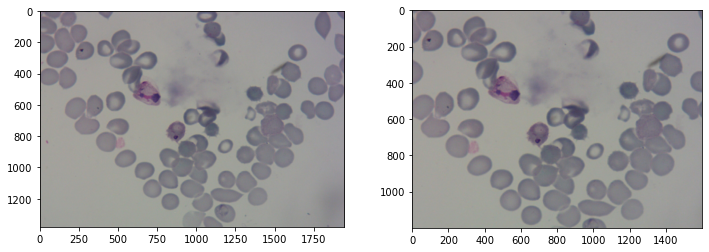

In [10]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DATA_DIR = "/export/gaon1/data/jteneggi/data/malaria/"
IMG_DIR = os.path.join(DATA_DIR, "images")
CROPPED_IMG_DIR = os.path.join(DATA_DIR, "cropped_images")
TROPHOZOITE_DIR = os.path.join(DATA_DIR, "trophozoite")
TROP_TRAIN_DIR = os.path.join(TROPHOZOITE_DIR, "train")
TROP_TEST_DIR = os.path.join(TROPHOZOITE_DIR, "test")
TROP_VAL_DIR = os.path.join(TROPHOZOITE_DIR, "val")

print(os.path.join(DATA_DIR, "training.json"))
df_test = pd.read_json(os.path.join(DATA_DIR, "test.json"))
df_test_cropped = df_test.copy()

class_dict = {
    "red blood cell": 0,
    "leukocyte": 1,
    "gametocyte": 2,
    "ring": 3,
    "trophozoite": 4,
    "schizont": 5,
    "difficult": 6
}

w = 1600
h = 1200
i = 0
image = df_test.loc[0]
fig = plt.figure(figsize=(12, 4))
axes = fig.subplots(1, 2)

image_name = os.path.basename(image["image"]["pathname"])
image_path = os.path.join(IMG_DIR, image_name)
img = Image.open(image_path)
axes[0].imshow(img)
_w, _h = img.size
left = int((_w - w)/2)
top = int((_h - h)/2)
right = left + w
bottom = top + h
cropped_img = img.crop((left, top, right, bottom))
axes[1].imshow(cropped_img)
cells = np.array(image["objects"])
ids = []
for j, cell in enumerate(cells):
    bbox = cell["bounding_box"]
    upper_left_r = bbox["minimum"]["r"]
    upper_left_c = bbox["minimum"]["c"]
    lower_right_r = bbox["maximum"]["r"]
    lower_right_c = bbox["maximum"]["c"]
    if upper_left_r < top or upper_left_c < left or lower_right_r > bottom or lower_right_c > right:
        ids.append(j)
cells_cropped = np.delete(cells, ids)
df_test_cropped.loc[i, "objects"] = list(cells_cropped)
cropped_img.save(os.path.join(CROPPED_IMG_DIR, image_name), "png")
